# Aim

1- Application of exploratory data analysis

2- Handling missing Data

# Techniques to handle missing data

1- Delete the record missing value

2- Create a separate model to handle missing value

3- Use of Statistical methods like mean, median or mode

In [1]:
# if most of the records are missing, then delete row, and it should be followed when data is in million
# if dataset is less, then every data is critical

# create a separate model

In [2]:
# takes much more time

In [3]:
# whichever data is missing, consider it to be testdata set
# consider remaining data set as train data set, create a model then use test data


# statistical methods

In [4]:
# Use of mean, median, and mode

# Use of statistical methods to handle missing data

# The Data

In [5]:
# import titanic train dataset, easily available on kaggle.com
# or you can download from the link provided on linkedin post

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
train = pd.read_csv('titanic_train_logistic.csv')

In [8]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
# in the above datasets, there are many columns, where there are missing values represented by NaN values

# Apply Exploratory Data Analysis

# Missing Data

We will create a heatmap to show missing data, yellow color is represented as missing values

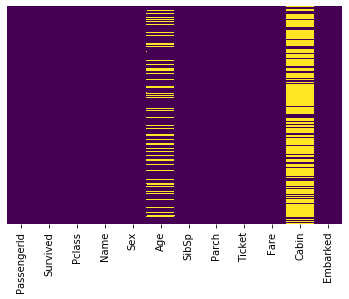

In [10]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
# yticklabels = False because we don't need y values
# cbar tells representation in terms of colors

In [11]:
# so heatmap shows that Age and Cabin columns are missing

In [12]:
# most of the data in cabin is missing, it is appropriate to remove cabin column from the data set

In [13]:
# we will check various parameters and do more exploratory data analysis using various data visualization tools

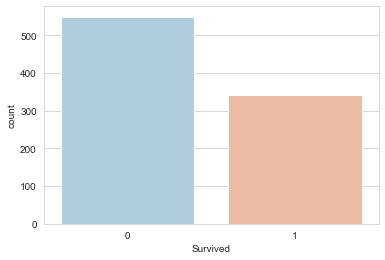

In [14]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', data = train, palette = 'RdBu_r')
# how many people have survived, 1- survived, 0 - not survived

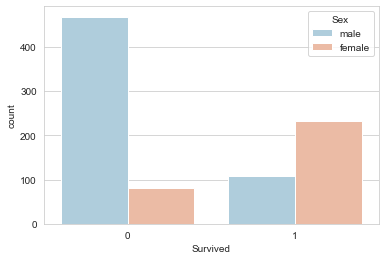

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

In [16]:
# more female survived

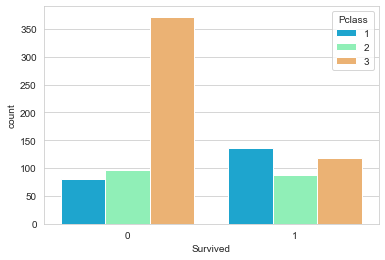

In [17]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

In [18]:
# here, we are visualizing survival based on class
# clearly. people in third class didn't survive

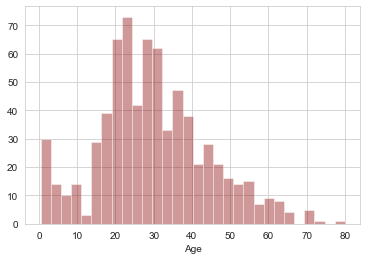

In [19]:
sns.distplot(train['Age'].dropna(), kde = False, color ='darkred', bins = 30)
# to check how age got distributed

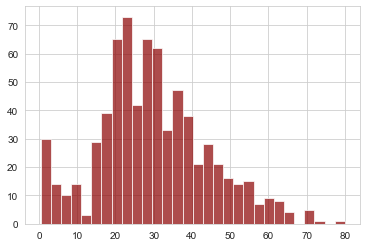

In [20]:
train['Age'].hist(bins = 30, color = 'darkred', alpha = 0.7)

# Now, Data cleaning part

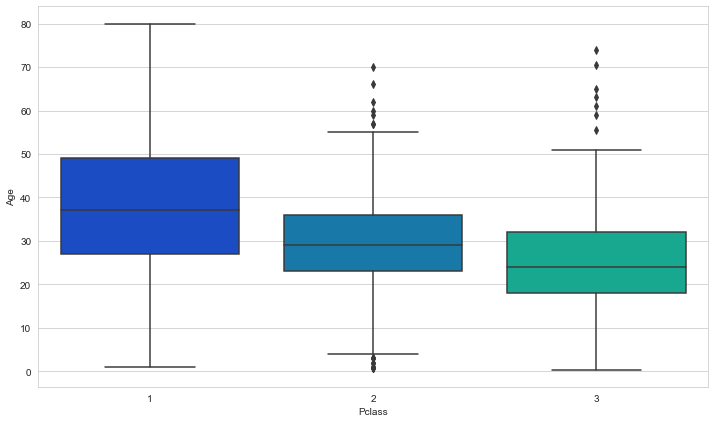

In [21]:
# creating a box plot
# x be passenger class
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

In [22]:
# this boxplot is giving information about median of ages in different class

# creating a function to replace empty data points with mean of ages in different classes

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:  # for class 3
            return 24
        
    else:
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

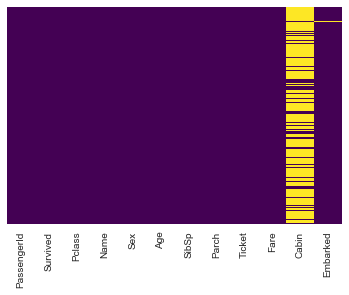

In [25]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
# clearly all missing values in age column are filled by our function

In [26]:
# now drop cabin column because there are many null values

In [27]:
train.drop('Cabin',axis=1,inplace=True)
# drop the cabin column

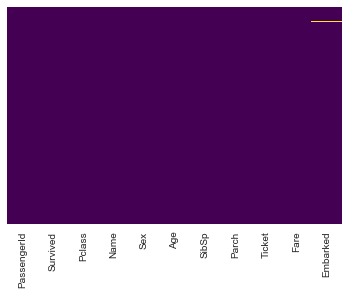

In [28]:

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [29]:
# now completely removed missing values using statistical techniques